In [1]:
import pandas as pd
df = pd.read_csv('sentiment_analysis_data.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [2]:
df.shape

(5842, 2)

In [3]:
X = df["Sentence"]
Y = df["Sentiment"]

In [5]:
Y.head()

0    positive
1    negative
2    positive
3     neutral
4     neutral
Name: Sentiment, dtype: object

In [7]:
print(len(dict(Y.value_counts())))

3


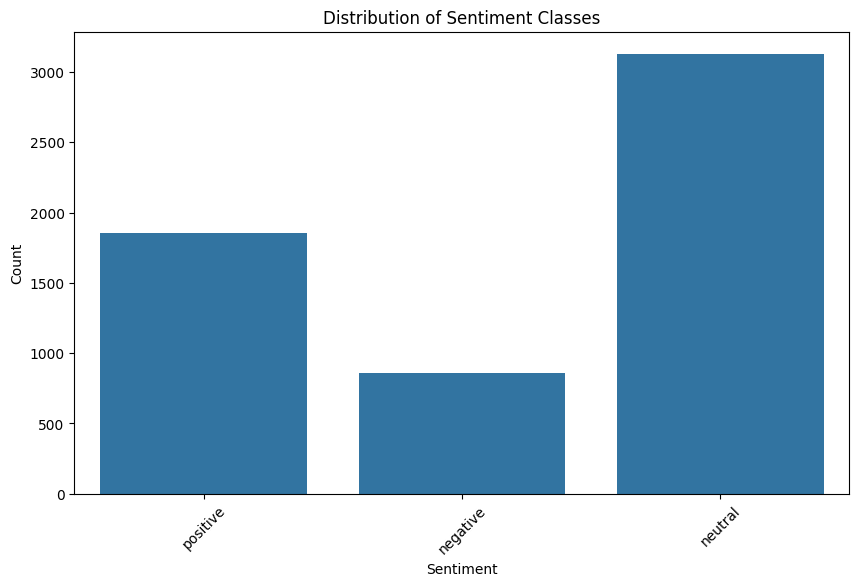


Class Distribution:
neutral: 3130 samples (53.58%)
positive: 1852 samples (31.70%)
negative: 860 samples (14.72%)


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Sentiment')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
sentiment_counts = Y.value_counts()
sentiment_percentages = Y.value_counts(normalize=True) * 100
print("\nClass Distribution:")
for sentiment in sentiment_counts.index:
    print(f"{sentiment}: {sentiment_counts[sentiment]} samples ({sentiment_percentages[sentiment]:.2f}%)")

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)
num_features = len(vectorizer.get_feature_names_out())

In [10]:
print(num_features)

11126


In [19]:
import numpy as np
try:
    if 'netflix' in vectorizer.get_feature_names_out():
        print(np.where(vectorizer.get_feature_names_out() == 'netflix')[0][0])
    else:
        print("The word 'netflix' is not in the feature names.")
except ValueError as e:
    print(f"The word 'netflix' is not in the feature names. Error: {e}")

6882


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_vectorized,Y,test_size=0.25,random_state=5)

In [43]:
print(Y_test[Y_test=='positive'].shape)

(472,)


In [49]:
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
model = MultinomialNB()
ros = RandomOverSampler(random_state=42)
X_train, Y_train = ros.fit_resample(X_train, Y_train)
model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))

0.6372347707049966


In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, model.predict(X_test), target_names=["negative", "neutral", "positive"]))

              precision    recall  f1-score   support

    negative       0.33      0.59      0.42       218
     neutral       0.77      0.68      0.72       771
    positive       0.72      0.59      0.65       472

    accuracy                           0.64      1461
   macro avg       0.61      0.62      0.60      1461
weighted avg       0.69      0.64      0.65      1461



In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, model.predict(X_test), target_names=["negative", "neutral", "positive"]))

              precision    recall  f1-score   support

    negative       0.41      0.37      0.39       218
     neutral       0.74      0.78      0.76       771
    positive       0.71      0.68      0.69       472

    accuracy                           0.69      1461
   macro avg       0.62      0.61      0.62      1461
weighted avg       0.68      0.69      0.68      1461



In [47]:
print(model.score(X_train,Y_train))

0.8557406984706688


In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,model.predict(X_test),labels = ["negative", "neutral", "positive"]))
# upar mai predicted hota hain and niche main actual

[[ 81  86  51]
 [ 89 605  77]
 [ 26 127 319]]


In [29]:
d = vectorizer.transform(['The compnay XYZ did not perform well in the first quarter. Its sales have been declining.'])
print(model.predict(d))

['neutral']


In [41]:
d = vectorizer.transform(['The growth rate of the company has been positive. Its shares price is also increasing. Customers like the companys policies'])
print(model.predict(d))

['positive']
